In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imdb = pd.read_csv('Data/imdb_labelled.csv')

In [18]:
keywords = ['good', 'great', 'winner', 'amazing', 'interesting', 'best', 
            'dynamic', 'purchase', 'loved', 'cool', 'no other film',
           'masterpiece', 'love', 'insane', 'fun', 'funny', 'riveting',
           'convincing', 'enjoyable', 'succeeded', 'classic', '10', 'beautiful'
           'fresh', 'joy', 'like', 'liked', 'happy', 'brilliant', 'rocked', 'nice', '!']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb[str(key)] = imdb.comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
imdb['target'] = (imdb['target'] == 1)

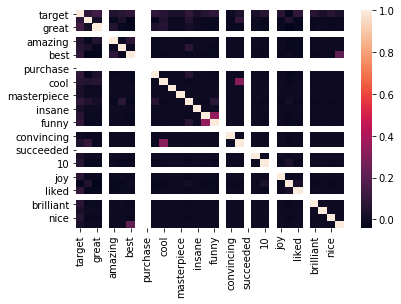

In [19]:
sns.heatmap(imdb.corr())

In [20]:
data = imdb[keywords]
target = imdb['target']

In [21]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 373


In [17]:
imdb

,comment,target,good,great,winner,amazing,interesting,best,dynamic,purchase,...,classic,10,beautifulfresh,joy,like,liked,happy,brilliant,rocked,nice
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Wasted two hours.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,A bit predictable.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Analysis
The dataset is from the IMDB comment section of movies, TV shows, and games. This dataset would be looking at the positive or negative factor in the comments. When selecting keywords there are the basic notion of positive in place. With words like 'happy', 'good', 'best', etc. Some of these words are often corresponding with positive comments but phrases like 'not very great' are a false positive for the keyword 'great'. This is just one example where the keywords will lead to false positive. I did include a phrase 'no other film', but this practice is tedious and nitpicking the data to get matching result. I still felt my results were much different from the previous example run. As my results yielded 37.3% mislabeled points. 

Further analysis of comment verbiage may yield better results. 